# Trabajo Final de Estadística
## Análisis Exploratorio de Datos
  
## Tema
Diagnóstico de Miopía en niños de 5 a 9 años.

La **miopía** es una enfermedad de la refracción del ojo en el cual los rayos de luz paralelos convergen en un punto focal situado delante de la retina, en lugar de converger en la misma retina; es lo contrario de la hipermetropía, en la que los rayos de luz llegan a la retina antes de converger. ​Lo cual afecta mayormente la visón lejana.

### Algunos Síntomas
- Visión borrosa al mirar objetos que están lejos
- Necesidad de entrecerrar los ojos para ver con claridad
- Dolores de cabeza
- Fatiga ocular​

### Indicadores en Niños
- Entrecerrar los ojos de forma constante
- Parecer que no nota los objetos alejados
- Parpadear mucho
- Frotarse los ojos con frecuencia
- Sentarse cerca de la televisión

### Factores de Riesgo de Miopía
- Genética
- Actividades prolongadas querequieren visión de cerca.
- Tiempo frente a las pantallas.
- Poco tiempo al aire libre.

Se evaluaron los datos de 554 niños inscritos en el Estudio Longitudinal de Miopía de Orinda (OLSM), California, Estados Unidos(1990-1995), como no miopes y 65 miopes para desarrollar un perfil predictivo para la aparición posterior de la miopía juvenil.

Estos datos fueron obtenidos en la página de Kaggle:

[Zadnik, K., Mutti, D. O., Friedman, N. E., Qualley, P. A., Jones, L.A., Qui, P., Kim, H. S., Hsu, J. C., & Moeschberger, M. L. (1999).Ocular predictors of the onset of juvenile myopia. Investigative ophthalmology & visual science, 40(9), 1936–1943.](https://pubmed.ncbi.nlm.nih.gov/10440246/)


## Variables
- `STUDYYEAR`: Año en el que se realizó la medición.
- `MYOPIC`: Variable booleana 0 si el sujeto desarrollara miopía en los siguientes 5 años o no
- `AGE`: La Edad del sujeto (de 5 a 9 años)
- `GENDER`: Género del sujeto 0 Femenino 1 Masculino,
- `SPHEQ`': El Spherical Equivalent Refraction (Equivalente Esférico de la Refracción) es una estimación del error refractivo de tus ojos.
- `AL`: La Longitud Axial se refiere a la distancia entre la parte posterior y la parte delantera del ojo   (Medición en milímetros mm).
  En un estudio que incluyó a 5,742 niños, se concluyo que el promedio de Longitud Axial (AL) era de 23.7 mm (rango: 18.3 mm a 30.4 mm).
- `ACD`: La Profundidad de la Cámara Anterior (ACD, por sus siglas en inglés) se refiere a la distancia entre la superficie anterior de la córnea y la superficie anterior del cristalino (Medición en milímetros).
- `LT`: El grosor del cristalino (Medición en milímetros mm) rango de 20.48-35.05 mm.
  Cambios con la Longitud Axial (AL): El LT no cambia de manera lineal con la AL. En ojos cortos, el LT aumenta a medida que la AL aumenta. Sin embargo, en ojos normales o moderadamente miopes, disminuye con una AL más larga. Curiosamente, en ojos altamente miopes, vuelve a aumentar con una AL mayor. El LT máximo se encuentra en el grupo de AL de 20.01–22 mm.
  El LT se correlaciona negativamente con la ACD.
- `VCD`: La Profundidad de la Cámara Vítrea (Vitreous Chamber Depth, en inglés) en oftalmología se refiere a la distancia entre la parte posterior del cristalino y la retina.
  En pacientes en edad pediátrica existe una correlacion débil directa, pero no puede asegurarse puesto que puede depender de otros factores.
- `SPORTHR`: Tiempo de Recreación al aire libre (Horas por Semana)
- `READHR`: Tiempo de Lectura recreativa (Horas por Semana)
- `COMPHR`: Tiempo Activo en Computadora o consolas (Horas por Semana).
- `STUDYHR`: Tiempo de estudio (Horas por Semana).
- `TVHR`: Tiempo viendo televisión (Horas por Semana).
- `DIOPTERHR`: Compuesto de actividades cercanas al trabajo (horas/semana).
- `MOMMY`: Se refiere a si la madre es miope 0 negativo, 1 positivo.
- `DADMY`: Se refiere a si el padre es miope 0 negativo, 1 positivo.


In [1]:
#Recursos para el análisis de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import sklearn as scikitlearn
import scipy.stats as st

sns.set()

/var/folders/z_/jz4f3stj0xq5g99z3sb19w3r0000gn/T/ipykernel_31484/3790927008.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Cargando los Datos

In [2]:
df=pd.read_csv('../data/myopia.csv')
print(df.columns)
df.describe()

Index(['ID', 'STUDYYEAR', 'MYOPIC', 'AGE', 'GENDER', 'SPHEQ', 'AL', 'ACD',
       'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR',
       'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')


ID    STUDYYEAR      MYOPIC         AGE      GENDER  \
count  618.000000   618.000000  618.000000  618.000000  618.000000   
mean   309.500000  1992.359223    0.131068    6.299353    0.488673   
std    178.545512     1.734507    0.337748    0.712950    0.500277   
min      1.000000  1990.000000    0.000000    5.000000    0.000000   
25%    155.250000  1991.000000    0.000000    6.000000    0.000000   
50%    309.500000  1992.000000    0.000000    6.000000    0.000000   
75%    463.750000  1994.000000    0.000000    6.000000    1.000000   
max    618.000000  1995.000000    1.000000    9.000000    1.000000   

            SPHEQ          AL         ACD          LT         VCD     SPORTHR  \
count  618.000000  618.000000  618.000000  618.000000  618.000000  618.000000   
mean     0.801010   22.496780    3.578629    3.541453   15.376780   11.953074   
std      0.625918    0.680141    0.230394    0.154519    0.664183    7.968296   
min     -0.699000   19.900000    2.772000    2.960000   13.380000    0.000000   
25%      0.456250   22.040000    3.424000    3.436000   14.930000    6.000000   
50%      0.729000   22.465000    3.585000    3.542000   15.360000   10.000000   
75%      1.034000   22.970000    3.730000    3.640000   15.840000   16.000000   
max      4.372000   24.560000    4.250000    4.112000   17.300000   45.000000   

           READHR      COMPHR     STUDYHR        TVHR   DIOPTERHR       MOMMY  \
count  618.000000  618.000000  618.000000  618.000000  618.000000  618.000000   
mean     2.796117    2.105178    1.490291    8.948220   26.017799    0.506472   
std      3.068191    3.056508    2.216207    5.719021   16.031715    0.500363   
min      0.000000    0.000000    0.000000    0.000000    2.000000    0.000000   
25%      0.000000    0.000000    0.000000    4.250000   15.000000    0.000000   
50%      2.000000    1.000000    1.000000    8.000000   23.000000    1.000000   
75%      4.000000    3.000000    2.000000   12.000000   34.000000    1.000000   
max     20.000000   30.000000   15.000000   31.000000  101.000000    1.000000   

            DADMY  
count  618.000000  
mean     0.498382  
std      0.500402  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

## Limpieza de Datos


In [3]:

df = df.dropna()
df.head(5)


ID  STUDYYEAR  MYOPIC  AGE  GENDER  SPHEQ     AL    ACD     LT    VCD  \
0   1       1992       1    6       1 -0.052  21.89  3.690  3.498  14.70   
1   2       1995       0    6       1  0.608  22.38  3.702  3.392  15.29   
2   3       1991       0    6       1  1.179  22.49  3.462  3.514  15.52   
3   4       1990       1    6       1  0.525  22.20  3.862  3.612  14.73   
4   5       1995       0    5       0  0.697  23.29  3.676  3.454  16.16   

   SPORTHR  READHR  COMPHR  STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  
0       45       8       0        0    10         34      1      1  
1        4       0       1        1     7         12      1      1  
2       14       0       2        0    10         14      0      0  
3       18      11       0        0     4         37      0      1  
4       14       0       0        0     4          4      1      0

## Visualización de Datos

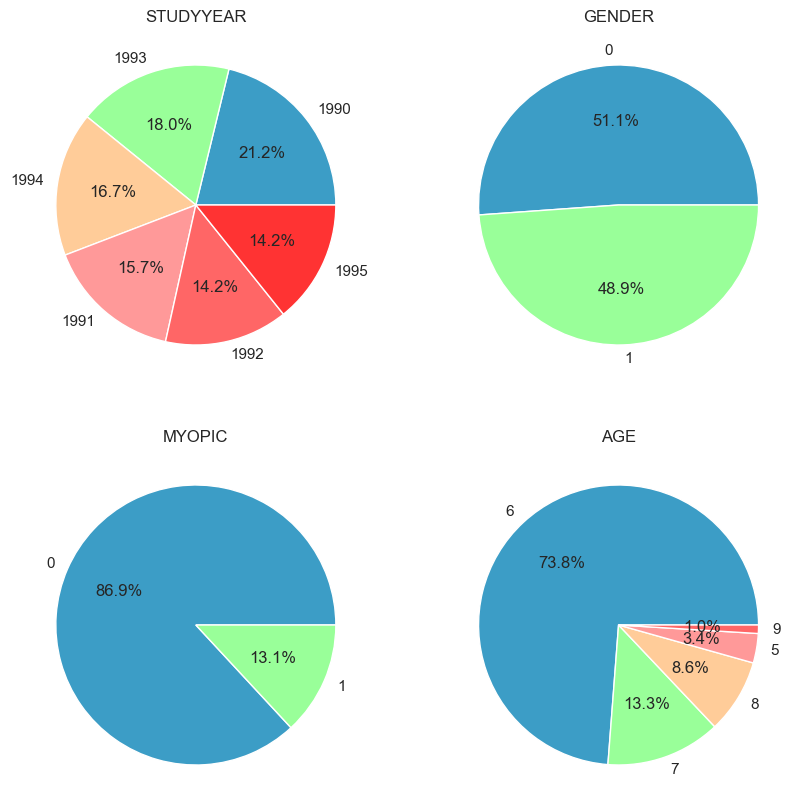

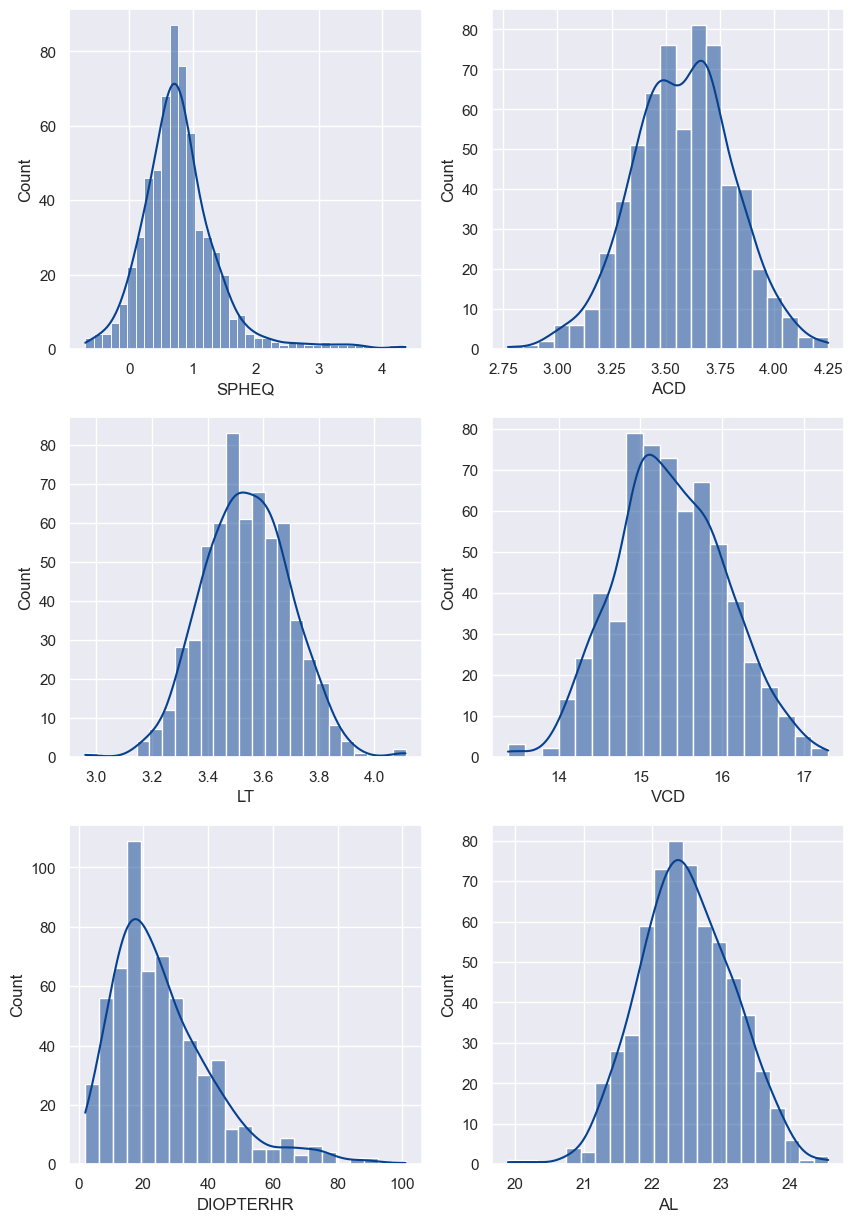

In [65]:
basecolor = "#06418f"
cols = [
    'ID', 
    'STUDYYEAR', 
    'MYOPIC', 
    'AGE', 
    'GENDER', 
    'MOMMY', 
    'DADMY',
    'READHR', 
    'COMPHR', 
    'STUDYHR', 
# En el primer grupo de Variables los datos son mas categoricos por lo que se decidió hacerle grafico de barras
# En en siguiente se le aplicará un histograma, para evidenciar posible normalidad de los datos
    'SPHEQ', 
    'AL', 
    'ACD',
    'LT', 
    'VCD', 
    'SPORTHR', 
    'TVHR',
    'DIOPTERHR'
]

cols1 = ['STUDYYEAR', 'GENDER' , 'MYOPIC', 'AGE']
fig, axs = plt.subplots(nrows = 2, ncols= 2, figsize=(10,10))
for i,col in enumerate(cols1):
    ax = axs[i//2, i%2]
    data = df[col].value_counts()
    ax.set_title(col)
    ax.pie(data, labels = data.index, autopct='%.1f%%', colors=['#3c9dc6', '#99ff99', '#ffcc99', '#ff9999', '#ff6666', '#ff3333', '#ff0000', '#cc0000', '#990000', '#660000', '#330000', ])

plt.show()

cols2 = ['SPHEQ', 'ACD' , 'LT', 'VCD','DIOPTERHR', 'AL']
fig, axs = plt.subplots(nrows = 3, ncols= 2, figsize=(10,15))
for i,col in enumerate(cols2):
    ax = axs[i//2, i%2]
    # if i < 9:
    #     ax.bar(df[col].value_counts().index, df[col].value_counts().values, color='green')
    #     ax.set_title(col)
    # else:
    sns.histplot(df[col], ax = ax, kde = True, color = basecolor)

# plt.figure(figsize=(10, 5))
# sns.histplot(df['DIOPTERHR'], kde=True, color='green')
plt.show()


### Algunos Ajustes

En las sucesivas pruebas que hicimos, siguiendo
algunas recomendaciones de expertos en estudio
de los ojos, y por simplicidad en algunos casos
hemos decidido hacer algunas convenios en los
datos...

Para mayor sencillez en los datos tendría sentido agrupar algunas de estas variables que en partes tienen información similar,
como `MOMMY` Y `DADMY` y resumirla en `PARENT` (si ninguno, uno, o los dos padres son miopes); `COMPHR` y `TVHR` resumirlas en `SCREENHR` (tiempo en pantalla) y `READHR`, `STUDYHR` en `BOOKHR` (Tiempo de lectura).

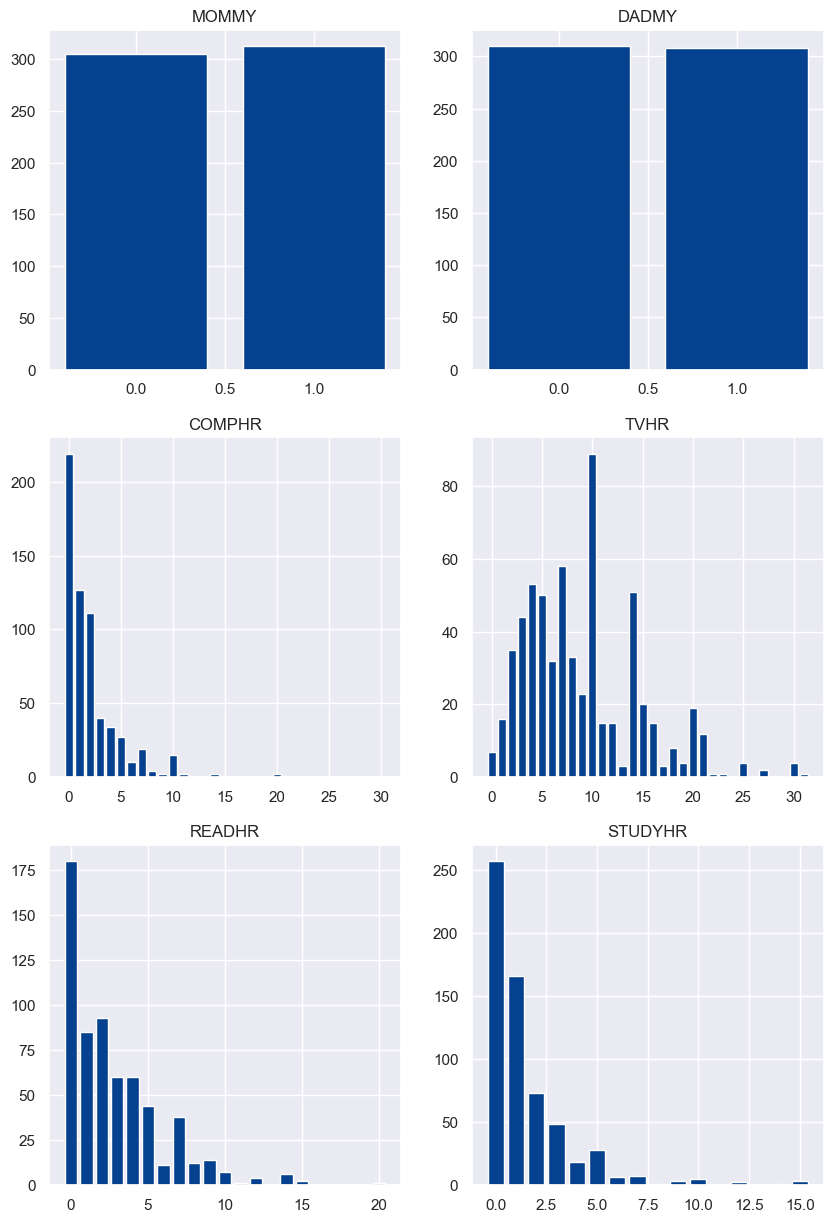

In [66]:

reduce = [
    ['MOMMY', 'DADMY', 'PARENT'],
    ['COMPHR', 'TVHR', 'SCREENHR'],
    ['READHR', 'STUDYHR', 'BOOKHR']
]

fig, axs = plt.subplots(nrows = 3, ncols= 2, figsize=(10,15))
for i,re in enumerate(reduce):
    ax1 = axs[i, 0]
    ax1.bar(df[re[0]].value_counts().index, df[re[0]].value_counts().values, color=basecolor)
    ax1.set_title(re[0])

    ax2 = axs[i, 1]
    ax2.bar(df[re[1]].value_counts().index, df[re[1]].value_counts().values, color=basecolor)
    ax2.set_title(re[1])

<Figure size 1000x500 with 0 Axes>

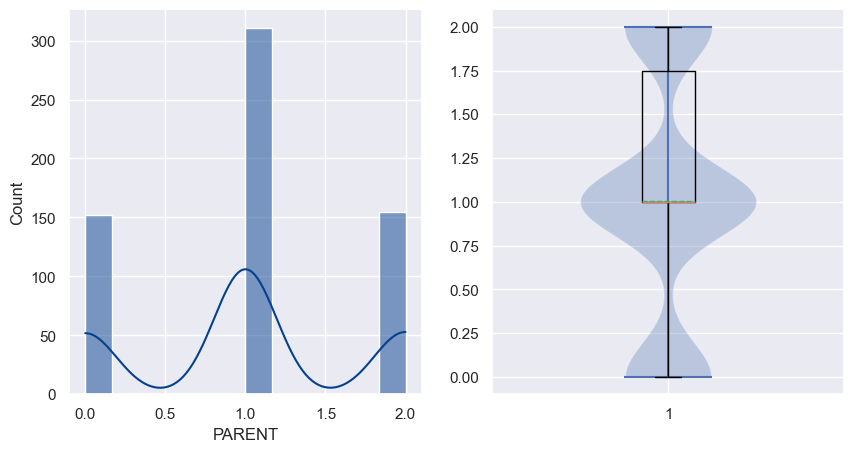

<Figure size 1000x500 with 0 Axes>

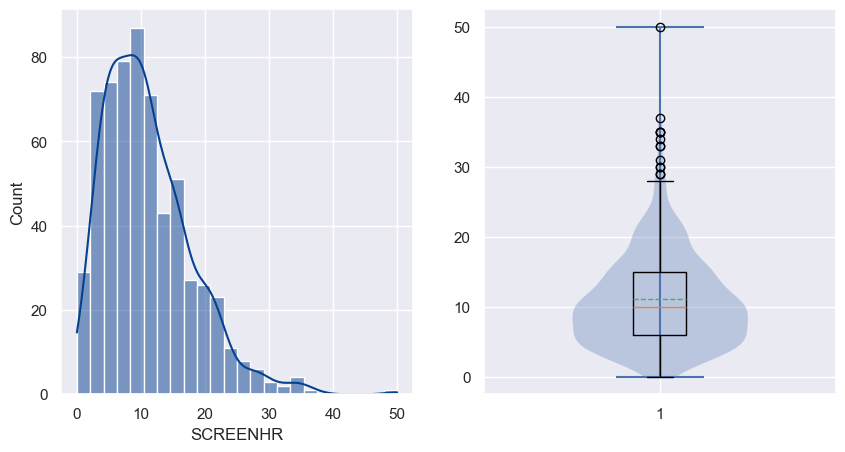

<Figure size 1000x500 with 0 Axes>

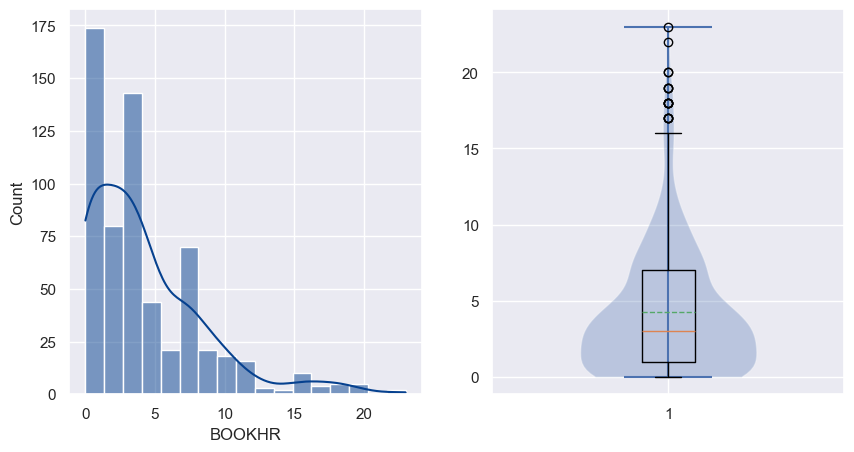

In [67]:

for i, r in enumerate(reduce):
    plt.figure(figsize=(10, 5))
    fig, axs = plt.subplots(nrows = 1, ncols= 2, figsize=(10,5))
    sum = df[r[:2]]
    df[r[2]] = sum.sum(axis=1)
    sns.histplot(df[r[2]], kde=True, color=basecolor, ax=axs[0])
    axs[1].violinplot(df[r[2]])
    axs[1].boxplot(df[r[2]], showmeans = True, meanline = True)
    plt.show()

# Se eliminan las columnas que ya fueron resumidas
# df= df.drop(columns=[ 'MOMMY', 'DADMY', 'COMPHR', 'TVHR', 'READHR', 'STUDYHR'])


## Pruebas de Hipótesis (Longitud Axial)
El uso de datos de longitud axial es valioso tanto para determinar el riesgo para la salud ocular, como para juzgar la eficacia de un tratamiento para el control de la miopía. Varios estudios han demostrado la correlación entre la biometría ocular, especialmente la AL, con los errores refractivos: se encontro que el diámetro corneal, el equivalente esférico de la refracción (SPHEQ) y la profundidad de la cámara anterior (ACD) afectaban los parámetros de la AL. Los niños tienden a tener longitudes axiales uniformes cuando son muy pequeños, pero después de los 9 años, los niños tienden a mostrar longitudes axiales más largas que las niñas y ademas tiende a diferenciarse según la etnia: los ojos asiáticos tienden a ser más largos que los ojos europeos.

#### Destacar:
- Los hombres suelen tener LA más largas que las mujeres.
- En niños de hasta 9 años la LA es no depende del sexo.
- Los ojos asiáticos tienden a ser mas alargados que los de europeos.
- [En un estudio que incluyó a 5,742 niños, se concluyo que el promedio de (AL) era de 23.7 mm](https://visionyoptica.com/la-longitud-axial-y-la-curvatura-corneal-ayudan-a-estimar-el-riesgo-de-miopia/)

### Verifiquemos si la Longitud Axial es normalmente distriuida

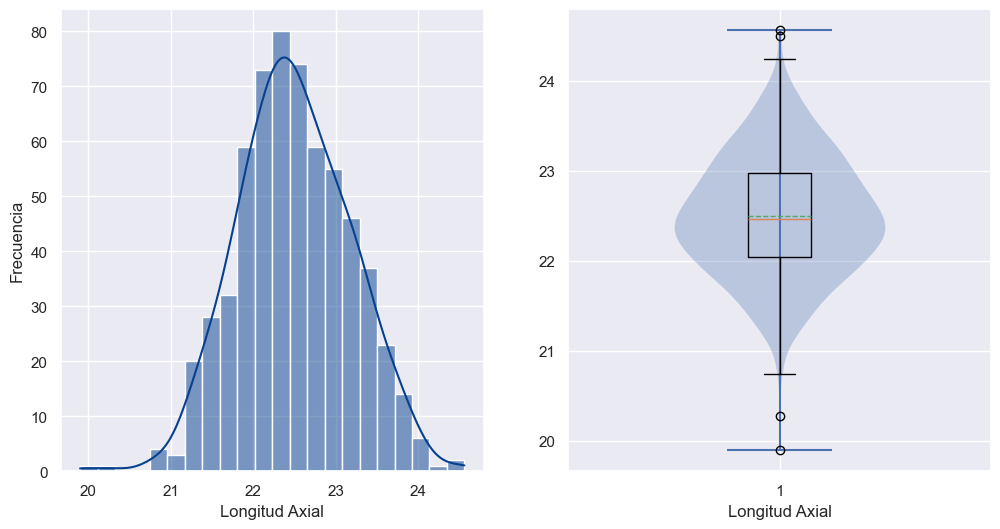

In [42]:
al = df['AL']
fig, axs = plt.subplots(nrows = 1, ncols= 2, figsize=(12,6))
sns.histplot(al, kde=True, color='#06418f', ax=axs[0])
axs[0].set_xlabel("Longitud Axial")
axs[0].set_ylabel("Frecuencia")


axs[1].violinplot(al)
axs[1].boxplot(al, showmeans = True, meanline = True)
axs[1].set_xlabel("Longitud Axial")
plt.show()

Se puede observar aparente comportamiento normal en el gráfico de Cajas y bigotes (+ grafico de violín) y en su histograma.

#### Gráfico Cuantil-Cuantil

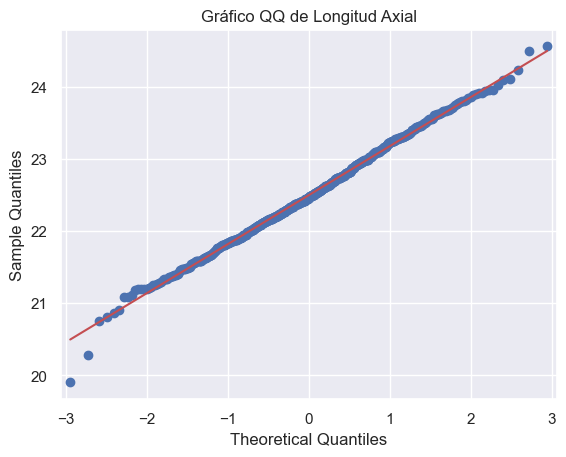

In [43]:
fig = sm.qqplot(df['AL'].dropna(), line='s')
plt.title('Gráfico QQ de Longitud Axial')
plt.show()


Los puntos se aproximan a una recta, por tanto los datos parecen estar normalmente distribuidos. Comprobemoslo rigurosamente con una Prueba de Normalidad.

#### Prueba de Normalidad

In [44]:
from scipy.stats import normaltest

# Estima los parámetros de la distribución normal a partir de los datos
mu, sigma = st.norm.fit(al)

# Realizar la prueba de normalidad
d_stat, p_value = st.kstest(al, 'norm', args=(mu, sigma))

print(f"d_stat = {d_stat}, p-value = {p_value}")

if p_value > 0.05:
    print("La Longitud Axial parece estar normalmente distribuida.")
    print(f"mu: {mu}, sigma: {sigma}")
else:
    print("La Longitud Axial no parece estar normalmente distribuida.")

d_stat = 0.026532731922633, p-value = 0.7665863791312545
La Longitud Axial parece estar normalmente distribuida.
mu: 22.496779935275082, sigma: 0.6795909345355546


En el test se tiene la hipótesis nula (H0) que nuestros datos siguen una distribución normal. Cómo p > 0.05
nuestro nivel de significación por defecto, entonces no existen evidencia suficiente para rechazar H0, por ende,
aceptamos que nuestros datos siguen una distribución normal.

### Prueba de Hipótesis Paramétrica (Media Poblacional)

In [52]:

mu0 = 22.9

# Realizar la prueba t de una muestra
t_stat, p_value = st.ttest_1samp(al, popmean=mu0, alternative='less')

print(f'Estadístico de prueba: {t_stat}')
print(f'Valor p: {p_value}')

help(st.ttest_1samp)

Estadístico de prueba: -14.737952079954459
Valor p: 1.2183724692267986e-42
Help on function ttest_1samp in module scipy.stats._stats_py:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then its length along
        `axis` must equal 1, and it must otherwise be broadcastable with `a`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
    

Como el p-valor es menor que el nivel de significancia (0.05), podemos rechazar la hipótesis nula (H0 : mu = 23.7 )y concluir que la media de la población no es 23.7. Es decir la media de la AL en nuestros datos no coincide
con lo esperando mundialmente

In [60]:

# Calcular la media de la muestra y la desviación estándar
media_muestra = np.mean(al)
desviacion_std_muestra = np.std(al, ddof=1)  # ddof=1 para la desviación estándar de la muestra

# Tamaño de la muestra
n = len(al)

# Calcular el error estándar de la media
sem = desviacion_std_muestra / np.sqrt(n)

# Calcular el intervalo de confianza del 95%
confianza = 0.95
alfa = 1 - confianza
t_critico = stats.t.ppf(1 - alfa/2, n - 1)

margen_error = t_critico * sem

limite_inferior = media_muestra - margen_error
limite_superior = media_muestra + margen_error

print(f'Intervalo de confianza del 95% para la media de la longitud axial: ({limite_inferior}, {limite_superior})')

Intervalo de confianza del 95% para la media de la longitud axial: (22.443051295487294, 22.55050857506287)


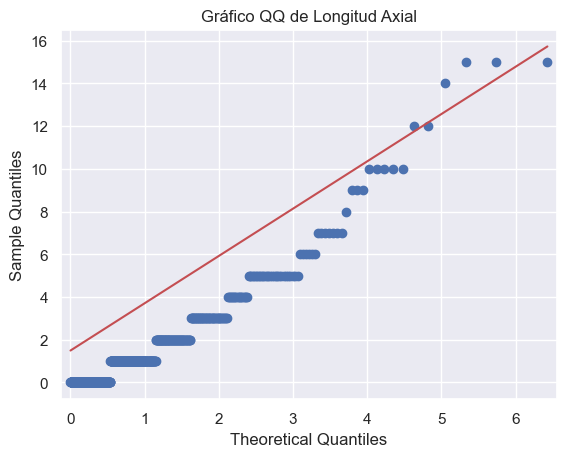

In [14]:
fig = sm.qqplot(df['STUDYHR'].dropna(), line='s', dist=st.expon)
plt.title('Gráfico QQ de Longitud Axial')
plt.show()
# help(sm.qqplot)

In [15]:
df['STUDYHR'].value_counts()


STUDYHR
0     257
1     166
2      73
3      48
5      28
4      18
7       7
6       6
10      5
15      3
9       3
12      2
14      1
8       1
Name: count, dtype: int64

## Correlación entre los datos

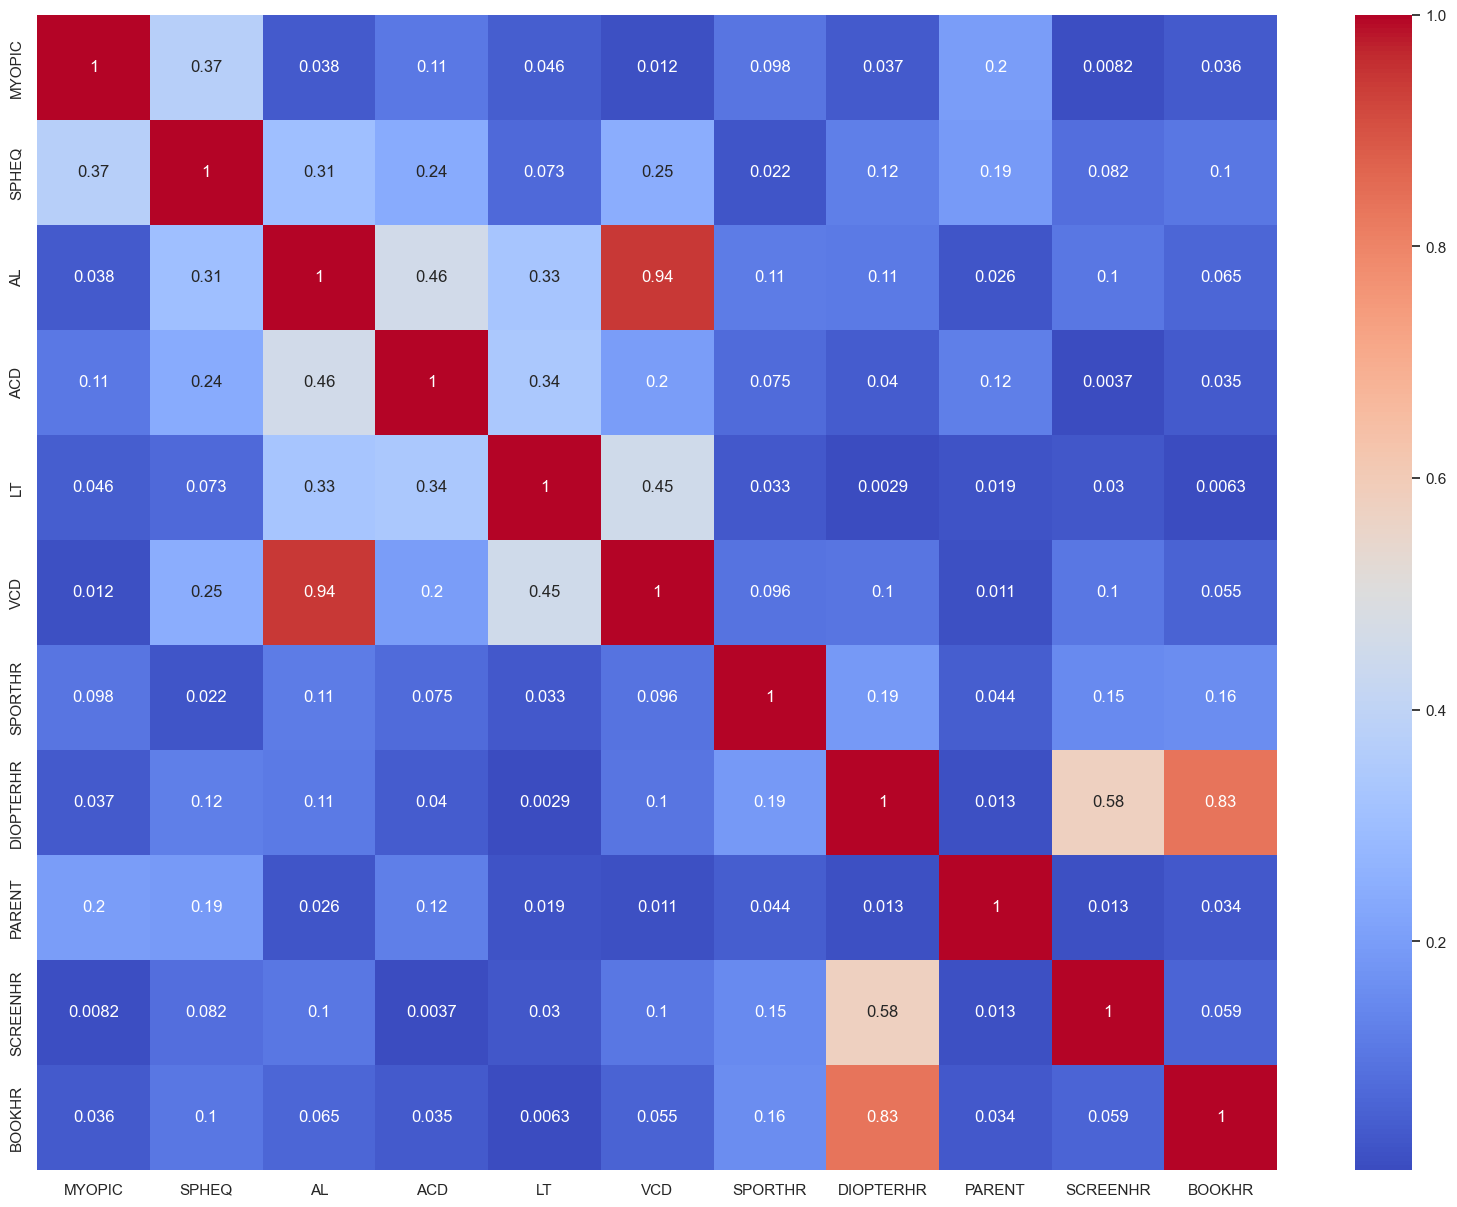

In [11]:
numericvars = df.copy()

# vamos a eliminar las columnas que no analizaremos
numericvars = numericvars.drop(columns=['ID', 'STUDYYEAR', 'AGE', 'GENDER'])
correlation_matrix = numericvars.corr()

fig, ax = plt.subplots(figsize=(20, 15)) 
sns.heatmap(np.abs(correlation_matrix), annot=True, cmap='coolwarm')
plt.show()

Se observa alta correlación entre las horas de
Lectura y el actividades cercanas al trabajo, y
esta a su vez con el tiempo en pantalla.
Alta correlación entre la Longitud Axial y la
Profundidad de la cámara vítrea.
Correlación entre la variable objetivo y el
equivalente de refracción, asi mismo con la
variable Padres.
En general el mapa de calor sobre lo frio
(correlaciones débiles)

## Gráfico de pares
Para la visualización más detallada de los datos se procede a hacer un gráfico de pares
- Los puntos amarillos representan los pacientes miopes
- Los puntos azules representan pacientes no miopes

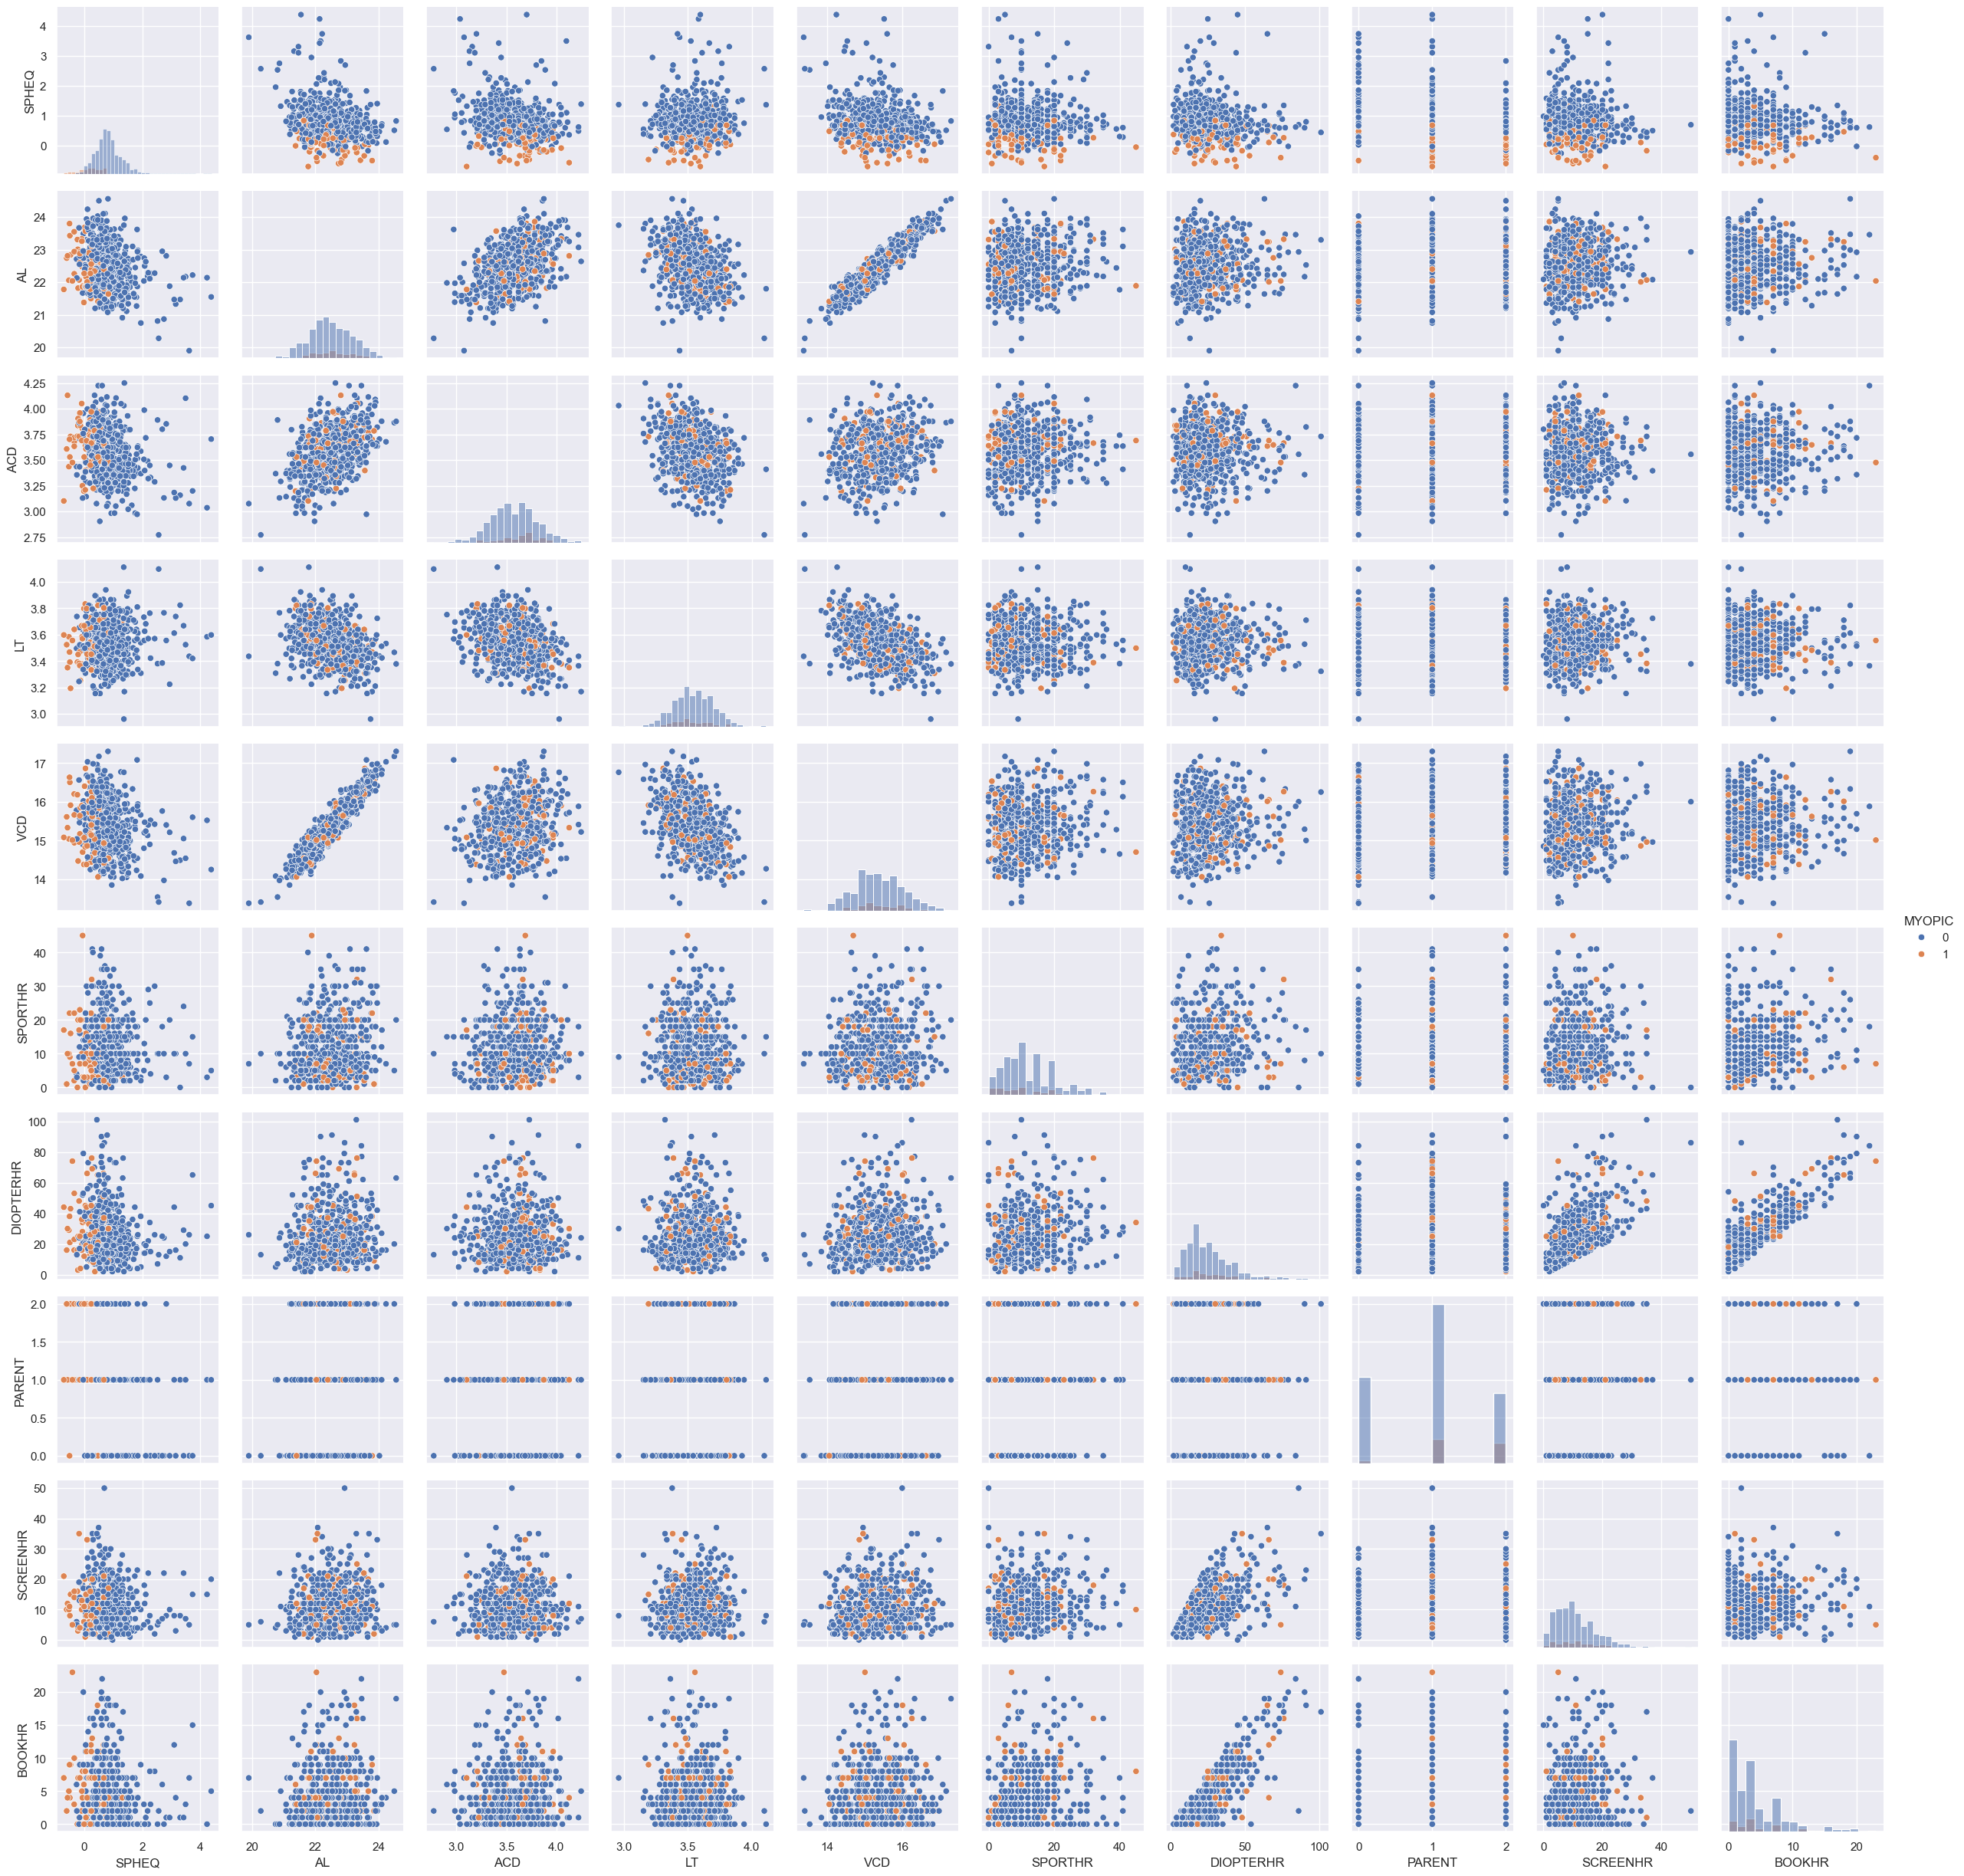

In [12]:
g = sns.PairGrid(numericvars, hue='MYOPIC')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

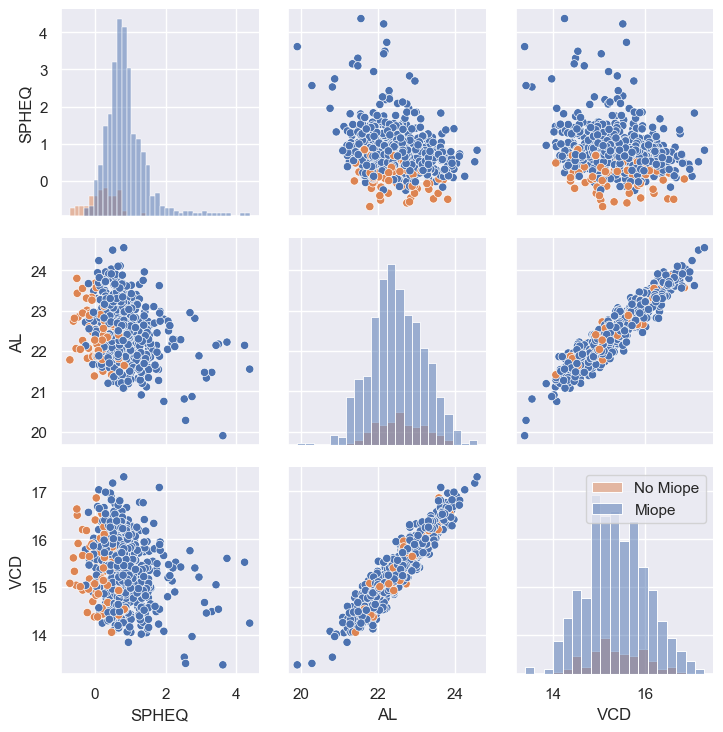

In [39]:
g = sns.PairGrid(df[['SPHEQ', 'AL', 'VCD', 'MYOPIC']], hue='MYOPIC')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.legend(['No Miope', 'Miope'])
plt.show()

# Modelo de Regresión Lineal
Se decide realizar el modelo de regresion con
estas variables, luego de probar
exhaustivamente con todas las variables y
retirando aquellas cuya significancia no es
buena (una a la vez).

In [13]:
from sklearn.model_selection import train_test_split

cols_reg = [
    'SPHEQ', 
    'AL', 
    # 'ACD',
    # 'LT', 
    # 'VCD', 
    'SPORTHR',
    # 'DIOPTERHR', 
    'PARENT'
    # 'SCREENHR',
    # 'BOOKHR'
]
X = df[cols_reg]
y = df['MYOPIC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 MYOPIC   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     28.52
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.55e-21
Time:                        10:24:58   Log-Likelihood:                -116.55
No. Observations:                 494   AIC:                             243.1
Df Residuals:                     489   BIC:                             264.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2645      0.477      2.651      0.0

Luego del proceso anteriormente descrito,
finalmente obtuvimos un modelo que predice
la miopia a teniendo en cuenta:
- Equivalente Esferico de refracción
- Longitud Axial
- Tiempo al aire libre
- Factor Genético

Del resumen del modelo se observan los valores Prob (F- statististic) cuyo valor es menor que $\alpha = 0.05$ por tanto alguno de nuestros parametros es significativamente distinto de cero, es decir, existe modelo; garantizamos  que las variables que intervienen en modelo sean significativas (P>|t|  es menor que 0.05), sin embargo el R-squared no es un valor muy cercano a uno por lo que no se puede decir que estamos ante un buen modelo de Regresión Lineal.

### Métricas

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 0.09695230112371872
Coeficiente de Determinación R^2: 0.08823328313253898


## Supuestos del Modelo de Regresión
EL modelo de regresión lineal para su concepción
se basa en una serie de supuestos, y estos deben
ser comprobados una vez construido el modelo
para demostrar (o no) que lo construimos sobre
bases sólidas

Una vez formulado nuestro modelo queda comprobar que se cumplen los supuestos, verificando así la validez del mismo.

#### Comprobando que el valor esperado de los residuos sea cero

In [15]:
residuos = model.resid
media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: -3.3419061490234977e-15
La media de los residuos es cero.
Suma de los residuos: -1.6509016376176078e-12
La suma de los residuos es cero.


#### Comprobando que los residuos estan normalmente distribuidos

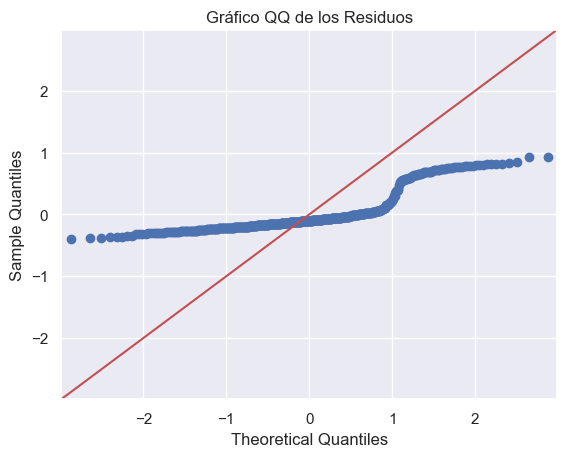

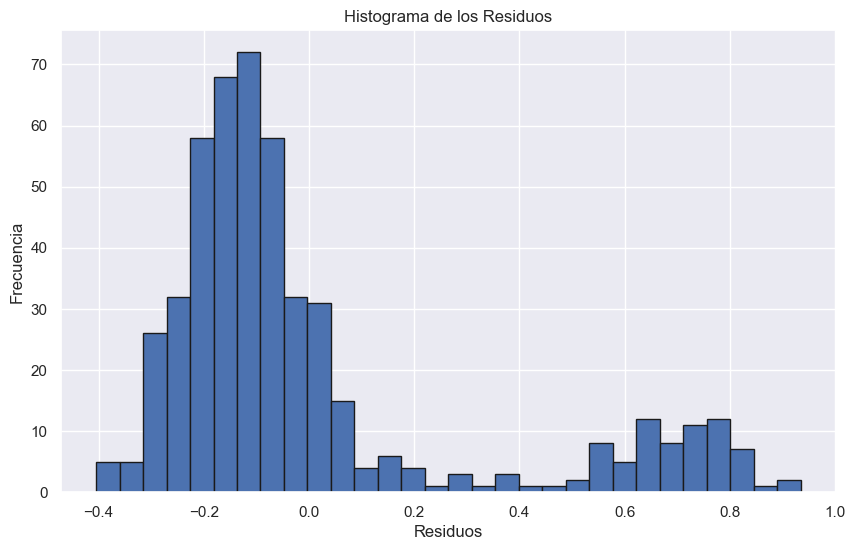

Stat = 132.30988853131257, p-value = 1.8589715992175417e-29
Los residuos no parecen estar normalmente distribuidos.


In [16]:

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45',)
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

from scipy.stats import normaltest

# Realizar la prueba de normalidad
Stat, p_value = normaltest(residuos)

print(f"Stat = {Stat}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

#### Comprobando independencia de los residuos (y por tanto de las variables)

In [17]:
from statsmodels.stats.stattools import durbin_watson

# Realizar el test de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f"Estadística de Durbin-Watson: {dw_stat}")

# Interpretación de la estadística de Durbin-Watson
if 1.5 < dw_stat < 2.5:
    print("No hay autocorrelación en los residuos.")
elif dw_stat < 1.5:
    print("Hay autocorrelación positiva en los residuos.")
else:
    print("Hay autocorrelación negativa en los residuos.")

Estadística de Durbin-Watson: 2.012721278596995
No hay autocorrelación en los residuos.


#### Comprobando la Homocedasticidad
La hipótesis nula de la prueba de Breusch-Pagan es
que los errores son homocedásticos. Por lo tanto,
como el valor p es menor que el nivel de
significancia, podemos rechazar la hipótesis nula y
concluir que hay evidencia de heterocedasticidad
en nuestro modelo

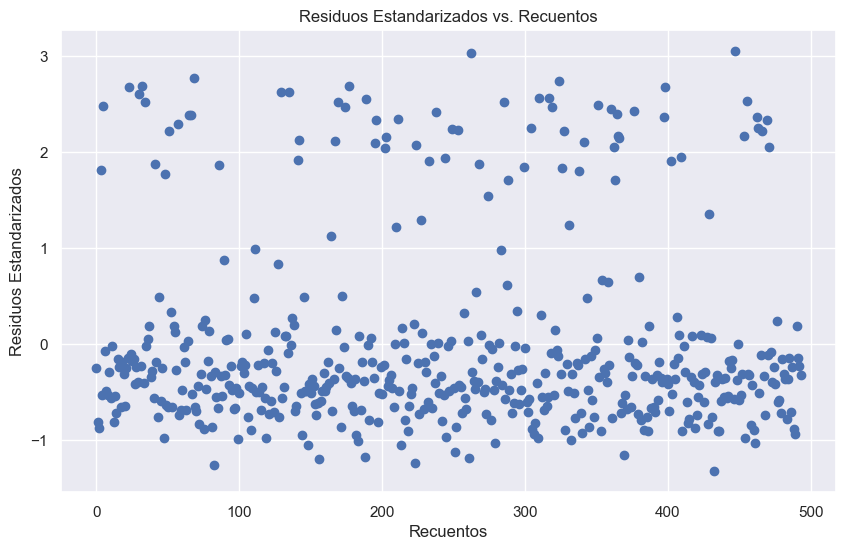

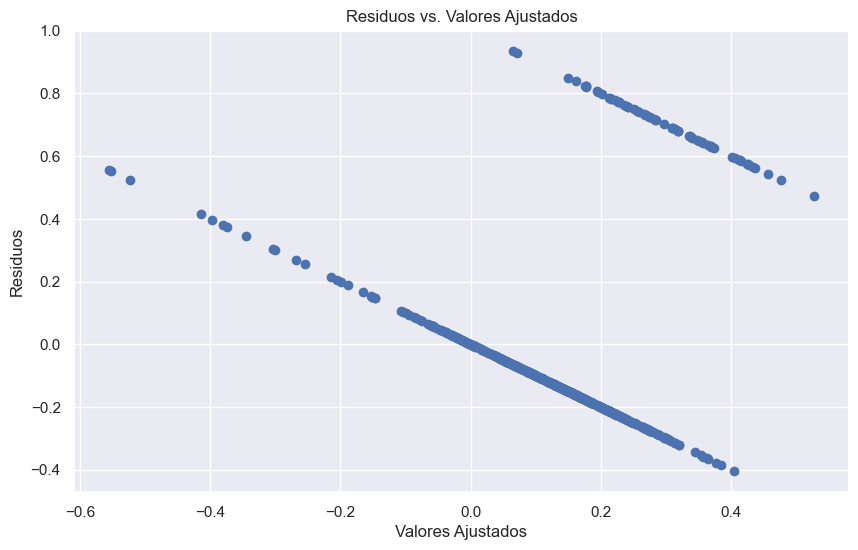

[('Lagrange multiplier statistic', 62.06157904864732), ('p-value', 1.0692197794909377e-12), ('f-value', 17.56506870119718), ('f p-value', 1.7607112093349162e-13)]


In [18]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

## ANOVA
En secciones anteriores resumimos la informacion parental relativa a la miopia, de los niños en la variable `PARENT`, lo cual nos aportaba tres grupos de interés: 
- Pacientes con ambos padres no miopes
- Pacientes con uno de los padres miopes
- Pacientes con ambos padres miopes
Y dado que sabemos que la miopía tiene entre sus factores la genética y la longitud Axial seria interesantes descubirir si existe diferencia significativa entre esta magnitud, con la herencia de padres miopes (o no).

Supuestos:
- Las poblaciones de las que se extraen las muestras tienen distribuciones normales.
- Las poblaciones tienen varianzas iguales (homocedasticidad).
- Las muestras son independientes entre sí.

In [68]:
from scipy.stats import f_oneway


parent0 = df[df['PARENT'] == 0]['AL']
parent1 = df[df['PARENT'] == 1]['AL']
parent2 = df[df['PARENT'] == 2]['AL']


# Realiza la prueba ANOVA
f_stat, p_value = f_oneway(parent0,parent1,  parent2)

print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 0.2108904421411994, P-Value: 0.809921330821077


Se evidencia que el p-value es mayor que el
nivel de signficación se asumirá que no hay
diferencia significativa entre las medias de
Longitud Axial en los pacientes según sus
padres
La hipótesis nula de la prueba ANOVA es que
todas las medias de los grupos son iguales. Por
lo tanto, un valor p mayor que el nivel de
significancia (en este caso, 0.05) significa que
no puedes rechazar la hipótesis nula.

### Análisis de los supuestos
#### Normalidad de las poblaciones


In [20]:
from scipy import stats

def normality(p):
    if p < 0.05:
        print("Hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal")

stat, p = stats.shapiro(parent0.sample(15))
print('Group0 - Normal Test: Statistics=%.3f, p=%.3f' % (stat, p))
normality(p)

stat, p = stats.shapiro(parent1.sample(15))
print('Group1 - Normal Test: Statistics=%.3f, p=%.3f' % (stat, p))
normality(p)

stat, p = stats.shapiro(parent2.sample(15))
print('Group2 - Normal Test: Statistics=%.3f, p=%.3f' % (stat, p))
normality(p)

Group0 - Normal Test: Statistics=0.937, p=0.341
No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal
Group1 - Normal Test: Statistics=0.967, p=0.813
No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal
Group2 - Normal Test: Statistics=0.950, p=0.530
No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal


#### Homocedasticidad

In [21]:
stat, p = stats.levene(parent0, parent1, parent2)
print('Levene Test: Statistics=%.3f, p=%.3f' % (stat, p))

Levene Test: Statistics=0.999, p=0.369


#### Analisis en profundidad de le longitud axial segun la miopía de los padres.

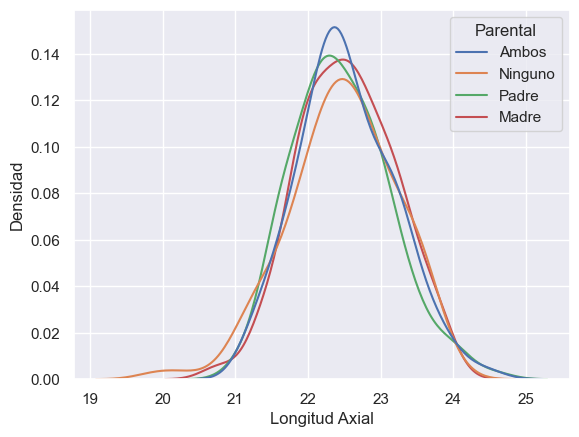

In [7]:
labels = ['Padre', 'Madre', 'Ambos']
conditions = [
    np.logical_and(df.MOMMY == 0, df.DADMY == 1),
    np.logical_and(df.MOMMY == 1, df.DADMY == 0),
    np.logical_and(df.MOMMY == 1, df.DADMY == 1),
]
df['Parental'] =  np.select(conditions, labels, default='Ninguno')

fig, ax = plt.subplots()
sns.kdeplot(data=df, x='AL', hue='Parental', ax=ax)
ax.set_xlabel('Longitud Axial')
ax.set_ylabel('Densidad')
plt.show()

In [40]:
my_dad = df[df.Parental == 'Padre']['AL']
my_mom = df[df.Parental == 'Madre']['AL']
my_both = df[df.Parental == 'Ambos']['AL']
my_none = df[df.Parental == 'Ninguno']['AL']

# Realiza la prueba ANOVA
f_stat, p_value = st.f_oneway(my_dad, my_mom, my_both, my_none)

print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 0.47495418853246363, P-Value: 0.6998323906531068


In [78]:
print(len(my_dad), len(my_mom), len(my_both), len(my_none))

153 158 155 152


In [79]:

def normality(p):
    if p < 0.05:
        print("Hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal")

for group in [my_dad, my_mom, my_both, my_none]:
    stat, p = st.shapiro(group.sample(15))
    print('Normal Test: Statistics=%.3f, p=%.3f' % (stat, p))
    normality(p)

Normal Test: Statistics=0.967, p=0.819
No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal
Normal Test: Statistics=0.966, p=0.789
No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal
Normal Test: Statistics=0.968, p=0.834
No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal
Normal Test: Statistics=0.966, p=0.793
No hay evidencia suficiente para rechazar la hipótesis nula, que los valores siguen una distribución normal


In [80]:
stat, p = stats.levene(my_dad, my_mom, my_both, my_none)
print('Levene Test: Statistics=%.3f, p=%.3f' % (stat, p))

Levene Test: Statistics=0.689, p=0.559


#### Independencia de las muestras
Nótese que cada paciente es un sujeto independiente de otro, y acabamos de verificar la independencia de cada variable involucrada en el modelo de regresión lineal, por tanto, particularmente, para las variables que intervienen en el analisis de varianza se cumple dicha independencia.

## Conclusiones
Luego de modelar la regresión lineal y comprobar sus supuestos, notamos que no se cumple el supuesto de Normalidad de los residuos por tanto nuestro modelo lineal no puede considerarse válido. Aunque de su ejecución podemos observar lo peculiar de sus gráficos, que parecen estar determinados en dos grupos, lo cual es sensato dado que nuestra variable objetivo `MYOPIC` (si el paciente tiene miopía o no) es una variable aleatoria (discreta) con solo dos posibles valores (0 o 1), por tanto podría decirse Bernoulli. De ahí que tenga sentido formular una regresión Logística.

## Regresión Logística

Los supuestos de un modelo de regresión logística son los siguientes:

1. Binomialidad de la variable dependiente: La variable dependiente debe ser binaria, es decir, debe tener solo dos posibles resultados (por ejemplo, 0 y 1, verdadero y falso, éxito y fracaso).
   
2. Independencia de las observaciones: Las observaciones (filas de tus datos) deben ser independientes entre sí.

3. Linealidad en el logaritmo de las probabilidades: La regresión logística asume que la relación entre el logaritmo de las probabilidades de la variable dependiente y las variables independientes es lineal.
   
4. Ausencia de multicolinealidad: Las variables independientes no deben estar altamente correlacionadas entre sí.
   
5. La regresión logística requiere un tamaño de muestra relativamente grande para proporcionar resultados significativos.

### Fórmula
$$ f(x) = \frac{1}{1+e^{-x}}$$
donde x es una expresión lineal

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cols_reg = [  
    'SPHEQ', 
    'ACD',
    'SPORTHR',  
    'PARENT',
]
X = df[cols_reg]
y = df['MYOPIC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

lreg = LogisticRegression(random_state=0)
# lreg.verbose = 1

model = lreg.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(f"TN: {cm[0, 0]} FP: {cm[0, 1]}")
print(f"FN: {cm[1, 0]} TP: {cm[1, 1]}")

cr = classification_report(y_test, y_pred)
print("Informe de clasificación:")
print(cr)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:")
print(accuracy)


Matriz de confusión:
TN: 158 FP: 4
FN: 16 TP: 8
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       162
           1       0.67      0.33      0.44        24

    accuracy                           0.89       186
   macro avg       0.79      0.65      0.69       186
weighted avg       0.88      0.89      0.88       186

Precisión del modelo:
0.8924731182795699


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


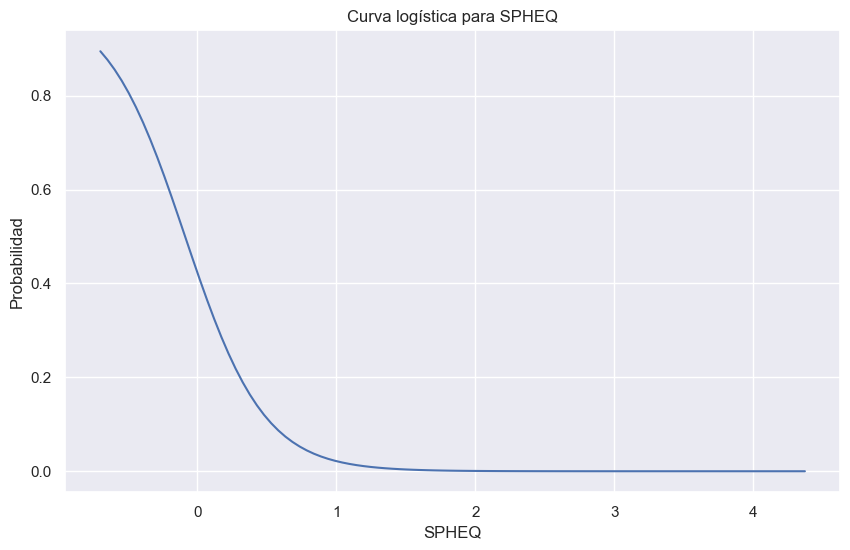

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


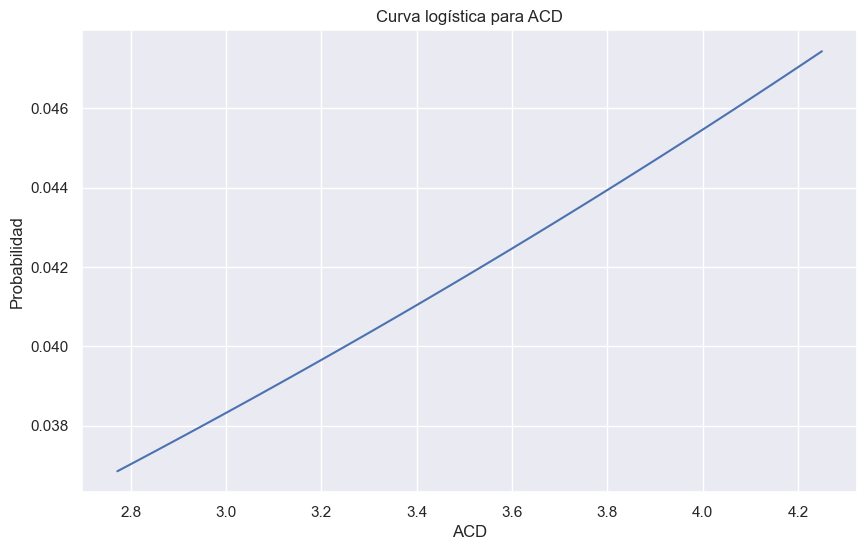

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


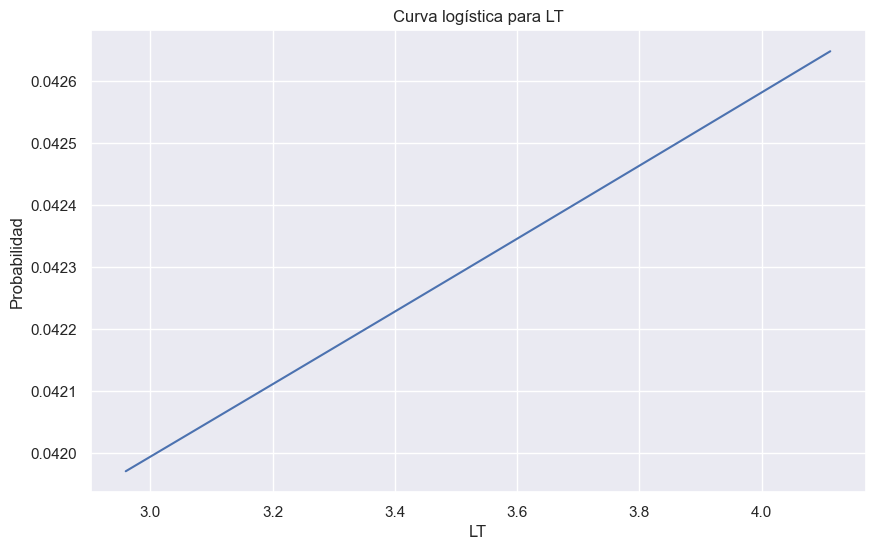

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


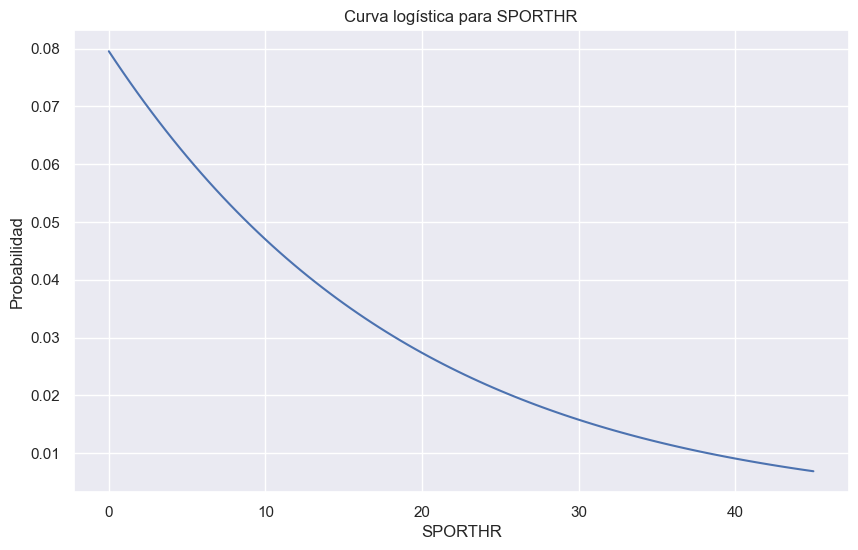

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


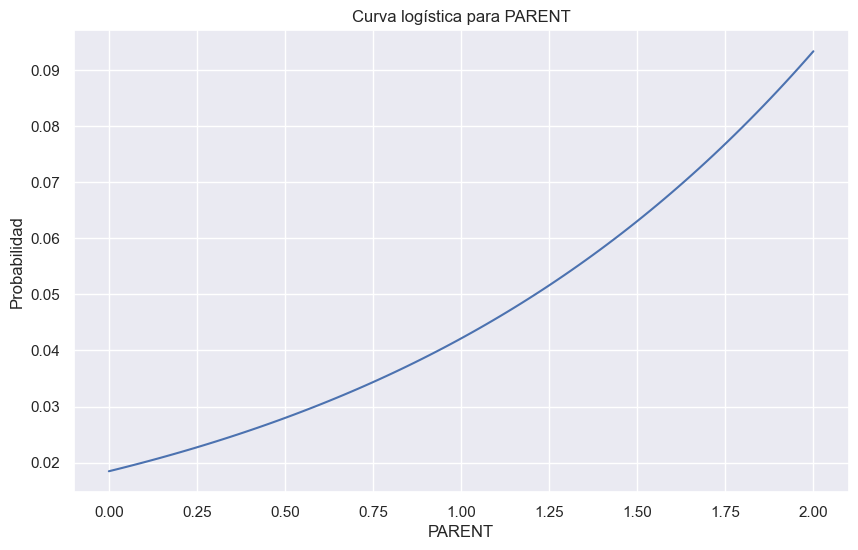

In [23]:
for i, col in enumerate(cols_reg):
    variable = col
    index = cols_reg.index(variable)

    # Crea un rango de valores para esa variable
    x_values = np.linspace(X[variable].min(), X[variable].max(), 100)

    # Mantén las demás variables en sus medias
    other_values = np.array([X[col].mean() for col in cols_reg])
    other_values = np.repeat(other_values.reshape(1, -1), 100, axis=0)

    # Reemplaza los valores de la variable escogida con el rango de valores
    other_values[:, index] = x_values

    # Escala los valores como hiciste con tus datos de entrenamiento
    scaler = StandardScaler().fit(X)
    other_values_scaled = scaler.transform(other_values)

    # Calcula las probabilidades predichas
    probs = model.predict_proba(other_values_scaled)[:, 1]

    # Grafica la curva logística
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, probs)
    plt.title(f'Curva logística para {variable}')
    plt.xlabel(variable)
    plt.ylabel('Probabilidad')
    plt.show()

## PCA

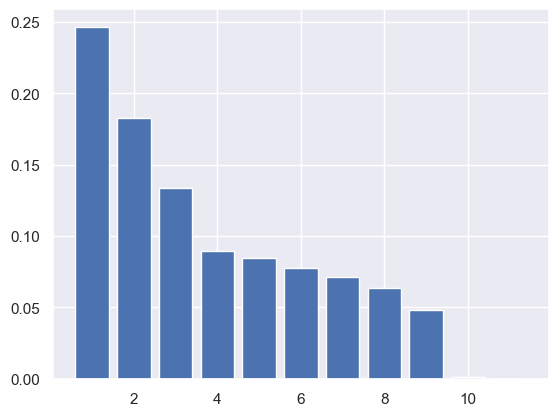

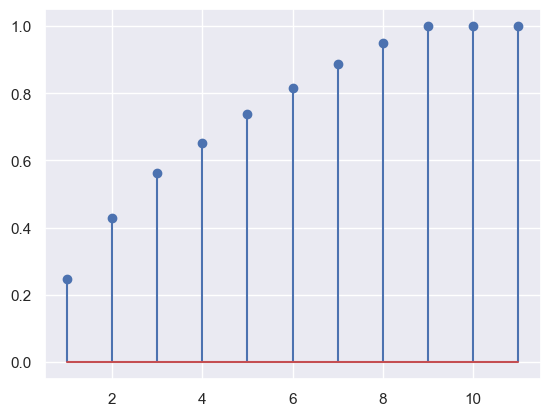

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_norm = pd.DataFrame(StandardScaler().fit_transform(numericvars), columns= numericvars.columns)

pca = PCA()
pca.fit_transform(df_norm)
variance_ratio = pca.explained_variance_ratio_
plt.bar(np.arange(variance_ratio.shape[0]) + 1, variance_ratio)
plt.show()

cum_variance = pca.explained_variance_ratio_.cumsum()
plt.stem(np.arange(variance_ratio.shape[0]) + 1, cum_variance)
plt.grid(True)

In [46]:
component_count = 5
pca = PCA(component_count)
principalComponents_breast = pca.fit_transform(df_norm)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast)
analysis = pd.DataFrame(pca.components_, columns=df_norm.columns, index=[f'PC{i}' for i in range(1,component_count+1)]).T
analysis

PC1       PC2       PC3       PC4       PC5
MYOPIC    -0.120454 -0.049308  0.613376 -0.048868 -0.148483
SPHEQ      0.299174  0.050090 -0.467105 -0.091011  0.078547
AL        -0.520255 -0.212575 -0.172806  0.101502 -0.150007
ACD       -0.328179 -0.185912  0.089782 -0.211029  0.432199
LT         0.310822  0.233969  0.152641  0.276959 -0.108813
VCD       -0.491128 -0.207417 -0.243471  0.112578 -0.278132
SPORTHR   -0.142877  0.190529 -0.221726  0.212847  0.724270
DIOPTERHR -0.274279  0.611682  0.024080 -0.085208 -0.084736
PARENT    -0.070563 -0.077274  0.483876  0.174378  0.360002
SCREENHR  -0.181837  0.367043 -0.012193  0.681063 -0.105524
BOOKHR    -0.214746  0.516137  0.032489 -0.546162 -0.028356

In [61]:
i = 1
for m, col in zip(analysis.max(), analysis.abs().columns):
    print(f"Las variables más influyentes en PC{i} son:")
    print(analysis.index[analysis[analysis.abs() > m/2][col].notna()].to_numpy(), '\n')
    i+=1

Las variables más influyentes en PC1 son:
['SPHEQ' 'AL' 'ACD' 'LT' 'VCD' 'DIOPTERHR' 'SCREENHR' 'BOOKHR'] 

Las variables más influyentes en PC2 son:
['DIOPTERHR' 'SCREENHR' 'BOOKHR'] 

Las variables más influyentes en PC3 son:
['MYOPIC' 'SPHEQ' 'PARENT'] 

Las variables más influyentes en PC4 son:
['SCREENHR' 'BOOKHR'] 

Las variables más influyentes en PC5 son:
['ACD' 'SPORTHR'] 

